Importing modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nba_py 
from nba_py import player

imporing data files

In [30]:
ncaa_stats = pd.read_csv('/home/bigley/Desktop/springboard/Basketball_Project/cleaned_data_NCAA.csv')
nba_stats = pd.read_csv('/home/bigley/Desktop/springboard/Basketball_Project/splits.csv')

In [273]:
ncaa_stats.head()

,Unnamed: 0,Player,Class,Season,Pos,School,Conf,G,MP,PER,...,Three point frequency,Two point %,Three point %,ast-to-tov,fta to fga,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min
0,0,Matt Cline,NaN,2010-11,NaN,South Alabama,Sun Belt,1.0,1.0,327.4,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0
1,1,Jake Drum,SR,2011-12,F,Auburn,SEC,2.0,1.0,181.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Lamar Bradbury,JR,2011-12,F,Charlotte,A-10,1.0,1.0,181.2,...,1.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
3,3,Trey Ford,FR,2015-16,G,Appalachian State,Sun Belt,1.0,1.0,141.7,...,1.0,NaN,1.0,NaN,0.0,NaN,NaN,1.0,0.0,0.0
4,4,Hans Christian Lauer,JR,2015-16,F,Illinois-Chicago,Horizon,1.0,2.0,129.6,...,0.0,1.0,NaN,NaN,2.0,NaN,NaN,0.0,0.0,0.5


In [274]:
nba_stats.head()

,DISPLAY_FIRST_LAST,GROUP_VALUE,AST,AST_PCT,AST_PCT_RANK,AST_RANK,AST_RATIO,AST_RATIO_RANK,AST_TO,AST_TO_RANK,...,USG_PCT_RANK,W,WEIGHT,W_PCT,W_PCT_RANK_x,W_PCT_RANK_y,W_RANK_x,W_RANK_y,playerID_x,playerID_y
0,Earl Cureton,1996-97,0.4,0.148,1,1,27.9,1,4.00,1,...,1,1,NaN,0.111,1,1,1,1,940,940
1,Andrew Gaze,1998-99,0.3,0.182,1,1,17.1,1,1.50,1,...,1,16,NaN,0.842,1,1,1,1,1845,1845
2,Chris Jent,1996-97,0.3,0.125,1,1,14.3,1,0.00,1,...,1,2,NaN,0.667,1,1,1,1,1137,1137
3,Adonis Jordan,1998-99,0.8,0.273,1,1,27.9,1,1.50,1,...,1,2,NaN,0.500,1,1,1,1,1817,1817
4,Chris King,1998-99,0.1,0.048,1,1,7.3,1,0.25,1,...,1,6,NaN,0.750,1,1,1,1,12,12


grab all NBA players from the NCAA stats

In [31]:
ncaa_stats= ncaa_stats.set_index(['Player', 'School'])
nba_stats_filt = nba_stats.set_index(['DISPLAY_FIRST_LAST', 'SCHOOL'])#set index to school so I can match to college data
nba_stats = nba_stats.set_index(['DISPLAY_FIRST_LAST', 'GROUP_VALUE']) #set index to year for easier manipulation
ncaa_in_nba = ncaa_stats.loc[np.unique(nba_stats_filt.index)] #filter all the players in the college data to only those who played in the nba 
nba_stats = nba_stats.dropna(subset = ['HEIGHT', 'WEIGHT']) #drop rows that don't have height and weight 

In [465]:

nba_stats.describe()


,AST,AST_PCT,AST_PCT_RANK,AST_RANK,AST_RATIO,AST_RATIO_RANK,AST_TO,AST_TO_RANK,BLK,BLKA,...,USG_PCT_RANK,W,WEIGHT,W_PCT,W_PCT_RANK_x,W_PCT_RANK_y,W_RANK_x,W_RANK_y,playerID_x,playerID_y
count,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,...,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,12808.000000,1.280800e+04,1.280800e+04
mean,1.960454,0.135819,4.995315,4.990397,15.638343,4.996096,1.435229,4.984541,0.428623,0.445682,...,5.000937,25.817224,223.196440,0.489060,4.984775,4.984775,4.909041,4.909041,1.864366e+05,1.864366e+05
std,1.886192,0.096496,3.986074,3.984351,8.865874,3.986467,0.900363,3.985988,0.484796,0.318283,...,3.987409,16.103954,27.979747,0.183204,3.984000,3.984000,3.953120,3.953120,3.845207e+05,3.845207e+05
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,133.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000e+00,2.000000e+00
25%,0.600000,0.067000,2.000000,2.000000,9.400000,2.000000,0.810000,2.000000,0.100000,0.200000,...,2.000000,12.000000,200.000000,0.361000,2.000000,2.000000,2.000000,2.000000,1.733000e+03,1.733000e+03
50%,1.300000,0.105000,4.000000,4.000000,13.800000,4.000000,1.310000,4.000000,0.300000,0.400000,...,4.000000,25.000000,225.000000,0.500000,4.000000,4.000000,4.000000,4.000000,1.011070e+05,1.011070e+05
75%,2.700000,0.187000,7.000000,7.000000,20.600000,7.000000,1.930000,7.000000,0.500000,0.600000,...,7.000000,38.000000,245.000000,0.615000,7.000000,7.000000,7.000000,7.000000,2.023292e+05,2.023292e+05
max,12.800000,1.000000,23.000000,23.000000,100.000000,23.000000,20.000000,23.000000,6.000000,2.200000,...,23.000000,73.000000,330.000000,1.000000,23.000000,23.000000,23.000000,23.000000,1.628935e+06,1.628935e+06


In [32]:
physicals = nba_stats[['HEIGHT', 'WEIGHT', 'SEASON_EXP', 'FROM_YEAR']]
physicals = physicals.set_index(physicals.index.get_level_values(0)) #go from multi index to index only by player
physicals = physicals[~physicals.index.duplicated(keep='last')] #drop duplicate index values (player names)
ncaa_in_nba_n = ncaa_in_nba.set_index(ncaa_in_nba.index.get_level_values(0)) #make indexes compatiable
ncaa_in_nba_n['Height'] = physicals['HEIGHT'] #create new columns from nba data
ncaa_in_nba_n['Weight'] = physicals['WEIGHT']
ncaa_in_nba_n['NBA_Experience'] = physicals['SEASON_EXP']
ncaa_in_nba_n['Rookie Year'] = physicals['FROM_YEAR']
#create column I forgot to in previous scripts 
ncaa_in_nba_n['fg_to_ast'] = ncaa_in_nba_n['FGA_x']/ncaa_in_nba_n['AST_x']

In [33]:
#change height from ft-in to inches
def height_convert(height):
    if type(height) != str:
        pass
    else:
        ht = height.split('-')
        ft = int(ht[0])
        inch =int(ht[1])
        height_in = ft*12 + inch
        return(float(height_in))
ncaa_in_nba_n['Height'] = ncaa_in_nba_n['Height'].apply(height_convert)


In [34]:
ncaa_in_nba_n = ncaa_in_nba_n.dropna(subset = ['Height', 'Weight'])    
ncaa_in_nba_n.describe()

,Unnamed: 0,G,MP,PER,TS%,OWS,DWS,WS,MP.1,FG_x,...,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie Year,fg_to_ast
count,2600.000000,2600.000000,2510.000000,870.000000,870.000000,870.000000,870.000000,870.000000,2472.000000,2562.000000,...,1748.000000,1748.000000,2419.000000,2477.000000,2477.000000,3085.000000,3085.000000,3085.000000,3085.000000,2562.000000
mean,36124.368462,31.839615,905.948207,20.673103,0.559698,2.412184,1.615402,4.028391,28.589239,4.616628,...,0.286732,0.713222,0.085280,0.030529,0.038400,78.793193,220.850243,5.664506,2005.658995,inf
std,22791.813416,4.821082,253.812856,5.247367,0.056784,1.397495,0.709539,1.838881,6.273477,1.692267,...,0.094069,0.094272,0.028928,0.031941,0.017477,3.601955,27.670523,4.675382,8.034121,NaN
min,320.000000,1.000000,12.000000,-1.800000,0.085000,-0.900000,0.000000,-0.100000,5.700000,0.900000,...,0.052632,0.456522,0.021849,0.000000,0.000000,65.000000,133.000000,0.000000,1976.000000,0.613636
25%,9297.000000,30.000000,768.000000,17.400000,0.528000,1.400000,1.200000,2.725000,25.475000,3.500000,...,0.218750,0.647059,0.065243,0.007653,0.025411,76.000000,200.000000,2.000000,1999.000000,3.353992
50%,42396.500000,33.000000,957.500000,20.650000,0.563000,2.400000,1.600000,4.100000,30.200000,4.600000,...,0.291596,0.707880,0.080666,0.018627,0.035539,79.000000,220.000000,4.000000,2006.000000,5.272727
75%,50577.750000,35.000000,1083.000000,24.000000,0.595750,3.300000,2.100000,5.300000,33.100000,5.800000,...,0.352941,0.781360,0.100000,0.043907,0.048476,82.000000,240.000000,9.000000,2012.000000,7.921474
max,84121.000000,41.000000,1543.000000,36.200000,0.767000,7.300000,4.100000,9.900000,40.000000,11.500000,...,0.543478,0.960526,0.233766,0.214367,0.147448,91.000000,330.000000,21.000000,2017.000000,inf


In [38]:
to_drop = ['PER', 'TS%', 'OWS', 'DWS', 'WS', 'Rk', 'Unnamed: 0']

In [36]:
name_cols = ['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg', '2P_pg', '2PA_pg', '3P_pg',
       '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg', 'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg',
       'BLK_pg', 'TOV_pg', 'PF_pg', 'PTS_pg', 'FG_t', 'FGA_t', '2P_t',
       '2PA_t', '3P_t', '3PA_t', 'FT_t', 'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t',
       'AST_t', 'STL_t', 'BLK_t', 'TOV_t', 'PF_t', 'PTS_t', 'Effective FG%',
       'True Shooting%', 'Two Point Frequency', 'Three point frequency',
       'Two point %', 'Three point %', 'ast-to-tov', 'fta to fga',
       'Offensive reb split', 'Defensive reb split', 'fouls per min',
       'blocks per min', 'steals per min', 'Height', 'Weight',
       'NBA_Experience', 'Rookie_Year','fg_to_ast'] #rename columns

In [39]:
ncaa_in_nba_n=ncaa_in_nba_n.drop(to_drop, axis=1)

In [40]:
ncaa_in_nba_n.columns =name_cols

In [41]:
def fix_3pt(percent):
    if np.isnan(percent) == True:
        return(0.0)
    else:
        return(percent)
ncaa_in_nba_n['Three point %']= ncaa_in_nba_n['Three point %'].apply(fix_3pt)

In [42]:
ncaa_clean = ncaa_in_nba_n.dropna( subset=['Conf', 'MP.1', 'ast-to-tov', 'fouls per min'], axis = 0)

In [43]:
ncaa_clean.describe()

,G,MP,MP.1,FG_pg,FGA_pg,2P_pg,2PA_pg,3P_pg,3PA_pg,FT_pg,...,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie_Year,fg_to_ast
count,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,...,1743.000000,1743.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000,2412.000000
mean,32.056799,920.262438,28.643242,4.622678,9.674627,3.682877,7.081053,0.939469,2.594403,2.883250,...,0.286681,0.713273,0.085152,0.030761,0.038296,78.548922,219.516169,5.390133,2006.874378,inf
std,4.604887,239.314321,6.243975,1.685841,3.552819,1.590166,2.863719,0.874948,2.255671,1.381129,...,0.094146,0.094350,0.028740,0.032092,0.017377,3.499199,26.595518,4.427577,7.025785,NaN
min,2.000000,35.000000,5.700000,1.000000,1.400000,0.400000,0.700000,0.000000,0.000000,0.200000,...,0.052632,0.456522,0.021849,0.000000,0.000000,65.000000,133.000000,0.000000,1988.000000,0.613636
25%,30.000000,787.750000,25.575000,3.500000,7.100000,2.500000,5.000000,0.100000,0.300000,1.800000,...,0.218530,0.647059,0.065230,0.007728,0.025407,76.000000,200.000000,2.000000,2001.000000,3.363005
50%,33.000000,966.000000,30.300000,4.650000,9.700000,3.600000,7.000000,0.800000,2.400000,2.700000,...,0.291667,0.707865,0.080645,0.018934,0.035543,79.000000,220.000000,4.000000,2007.000000,5.255435
75%,35.000000,1089.000000,33.100000,5.800000,12.200000,4.700000,9.025000,1.600000,4.300000,3.800000,...,0.352846,0.781754,0.099891,0.044521,0.048349,81.000000,240.000000,9.000000,2013.000000,7.936842
max,41.000000,1543.000000,40.000000,11.500000,22.800000,9.900000,18.600000,4.500000,10.300000,7.600000,...,0.543478,0.960526,0.233766,0.214367,0.147448,87.000000,290.000000,20.000000,2017.000000,inf


In [48]:
ncaa_clean[ncaa_clean['Rookie_Year'] < 2013]['NBA_Experience']

A.J. Guyton          3.0
A.J. Guyton          3.0
A.J. Guyton          3.0
Aaron Brooks        10.0
Aaron Brooks        10.0
Aaron Brooks        10.0
Aaron Brooks        10.0
Aaron Gray           6.0
Aaron Gray           6.0
Aaron Gray           6.0
Aaron McKie         13.0
Aaron McKie         13.0
Acie Earl            3.0
Acie Law             4.0
Acie Law             4.0
Acie Law             4.0
Acie Law             4.0
Adam Harrington      1.0
Adam Harrington      1.0
Adam Morrison        3.0
Adam Morrison        3.0
Adam Morrison        3.0
Adonal Foyle        12.0
Adonal Foyle        12.0
Adonal Foyle        12.0
Adrian Griffin       9.0
Adrian Griffin       9.0
Adrian Griffin       9.0
Adrian Griffin       9.0
Al Horford          11.0
                    ... 
Wesley Matthews      9.0
Wesley Matthews      9.0
Wesley Matthews      9.0
Wesley Person       11.0
Wesley Person       11.0
Will Barton          6.0
Will Barton          6.0
Will Blalock         1.0
Will Blalock         1.0


In [49]:
ncaa_in_nba_n.corr()

,G,MP,MP.1,FG_pg,FGA_pg,2P_pg,2PA_pg,3P_pg,3PA_pg,FT_pg,...,Offensive reb split,Defensive reb split,fouls per min,blocks per min,steals per min,Height,Weight,NBA_Experience,Rookie_Year,fg_to_ast
G,1.000000,0.570400,0.075404,0.021393,0.003735,-0.016649,-0.041333,0.070824,0.058189,-0.043853,...,-0.040441,0.039922,-0.121844,-0.046915,-0.037060,-0.043463,-0.042104,-0.016891,0.234790,-0.071809
MP,0.570400,1.000000,0.853675,0.606704,0.644320,0.402426,0.450248,0.437320,0.441894,0.497284,...,-0.335134,0.334768,-0.620507,-0.233503,0.097414,-0.285571,-0.254366,0.060784,0.026922,-0.235560
MP.1,0.075404,0.853675,1.000000,0.731679,0.787498,0.509481,0.581953,0.483909,0.500130,0.637460,...,-0.377318,0.376901,-0.672685,-0.249174,0.141553,-0.314551,-0.279249,0.076025,-0.096252,-0.244025
FG_pg,0.021393,0.606704,0.731679,1.000000,0.933338,0.858871,0.871346,0.371629,0.366569,0.715888,...,-0.132238,0.132592,-0.434159,-0.067303,0.043235,-0.049436,-0.002969,0.168832,-0.209111,0.075193
FGA_pg,0.003735,0.644320,0.787498,0.933338,1.000000,0.677732,0.771963,0.572035,0.596701,0.692798,...,-0.282834,0.282732,-0.546582,-0.249157,0.146775,-0.252551,-0.212610,0.110214,-0.168078,-0.043651
2P_pg,-0.016649,0.402426,0.509481,0.858871,0.677732,1.000000,0.963136,-0.155583,-0.150924,0.647275,...,0.156186,-0.154818,-0.159074,0.223134,-0.076917,0.262480,0.319940,0.204065,-0.256550,0.239980
2PA_pg,-0.041333,0.450248,0.581953,0.871346,0.771963,0.963136,1.000000,-0.064845,-0.049292,0.691085,...,0.066705,-0.065373,-0.233978,0.129468,-0.021793,0.154337,0.215283,0.179471,-0.253163,0.190885
3P_pg,0.070824,0.437320,0.483909,0.371629,0.572035,-0.155583,-0.064845,1.000000,0.980667,0.209156,...,-0.512123,0.510521,-0.547336,-0.532500,0.222196,-0.570032,-0.583798,-0.044717,0.062520,-0.290267
3PA_pg,0.058189,0.441894,0.500130,0.366569,0.596701,-0.150924,-0.049292,0.980667,1.000000,0.215980,...,-0.518680,0.516920,-0.564011,-0.554617,0.257694,-0.591907,-0.606229,-0.053089,0.055837,-0.309702
FT_pg,-0.043853,0.497284,0.637460,0.715888,0.692798,0.647275,0.691085,0.209156,0.215980,1.000000,...,-0.174028,0.174309,-0.320258,-0.079734,0.061276,-0.078845,-0.009885,0.129897,-0.155125,-0.028289


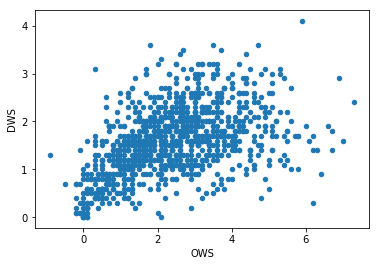

In [62]:
ncaa_clean.plot(x='OWS', y= 'DWS',kind='scatter')
plt.show()

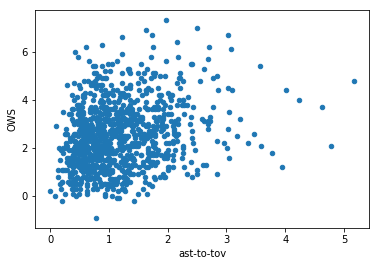

In [65]:
ncaa_clean.plot(y='OWS', x= 'ast-to-tov',kind='scatter')
plt.show()

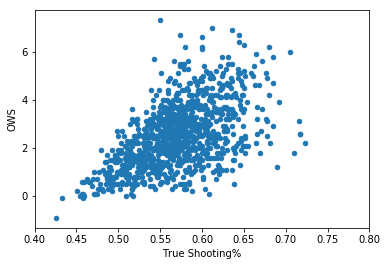

In [68]:
ncaa_clean.plot(x='True Shooting%', y= 'OWS',kind='scatter')
plt.xlim(0.4, 0.8)
plt.show()

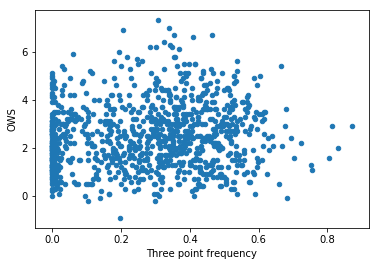

In [70]:
ncaa_clean.plot(x='Three point frequency', y= 'OWS',kind='scatter')
plt.show()

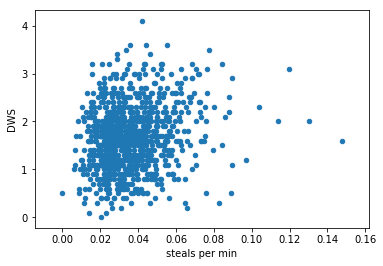

In [72]:
ncaa_clean.plot(y='DWS', x= 'steals per min',kind='scatter')
plt.show()

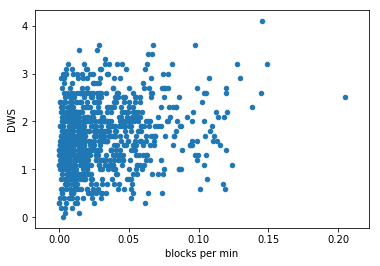

In [98]:
ncaa_clean.plot(y='DWS', x= 'blocks per min',kind='scatter')
plt.show()

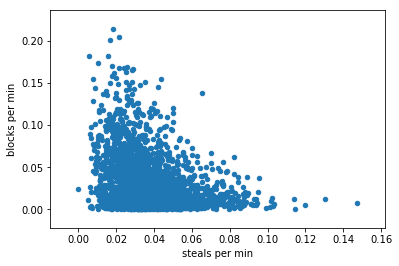

In [504]:
ncaa_clean.plot(y='blocks per min', x= 'steals per min',kind='scatter')
plt.show()

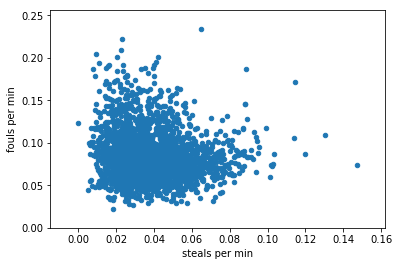

In [505]:
ncaa_clean.plot(y='fouls per min', x= 'steals per min',kind='scatter')
plt.show()

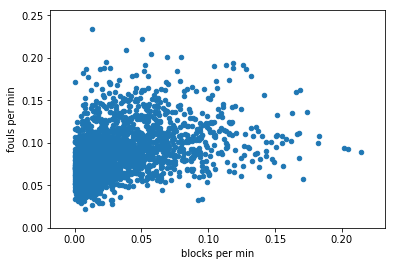

In [506]:
ncaa_clean.plot(y='fouls per min', x= 'blocks per min',kind='scatter')
plt.show()

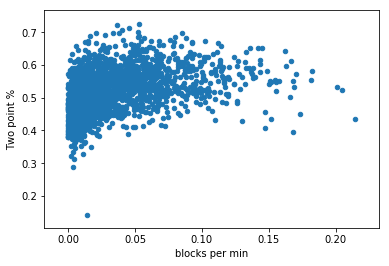

In [507]:
ncaa_clean.plot(y='Two point %', x= 'blocks per min',kind='scatter')
plt.show()

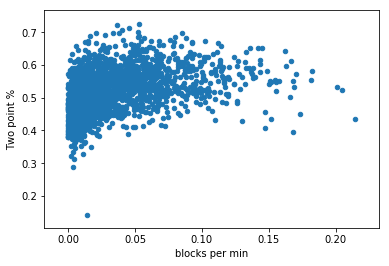

In [509]:
ncaa_clean.plot(y='Two point %', x= 'blocks per min',kind='scatter')
plt.show()

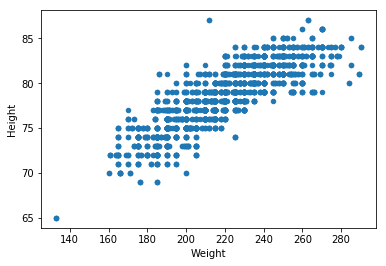

In [510]:
ncaa_clean.plot(y='Height', x= 'Weight',kind='scatter')
plt.show()

In [523]:
ncaa_clean.columns

Index(['Class', 'Season', 'Pos', 'Conf', 'G', 'MP', 'MP.1', 'FG_pg', 'FGA_pg',
       '2P_pg', '2PA_pg', '3P_pg', '3PA_pg', 'FT_pg', 'FTA_pg', 'ORB_pg',
       'DRB_pg', 'TRB_pg', 'AST_pg', 'STL_pg', 'BLK_pg', 'TOV_pg', 'PF_pg',
       'PTS_pg', 'FG_t', 'FGA_t', '2P_t', '2PA_t', '3P_t', '3PA_t', 'FT_t',
       'FTA_t', 'ORB_t', 'DRB_t', 'TRB_t', 'AST_t', 'STL_t', 'BLK_t', 'TOV_t',
       'PF_t', 'PTS_t', 'Effective FG%', 'True Shooting%',
       'Two Point Frequency', 'Three point frequency', 'Two point %',
       'Three point %', 'ast-to-tov', 'fta to fga', 'Offensive reb split',
       'Defensive reb split', 'fouls per min', 'blocks per min',
       'steals per min', 'Height', 'Weight', 'NBA_Experience', 'fg_to_ast'],
      dtype='object')

In [519]:
f = ncaa_clean.reset_index()
f.set_index(['index', 'Season'])

Class Pos      Conf     G      MP  MP.1  FG_pg  \
index               Season                                                   
A.J. Guyton         1999-00    SR   G   Big Ten  29.0   995.0  34.3    7.0   
                    1998-99    JR   G   Big Ten  34.0  1158.0  34.1    5.8   
                    1996-97    FR   G   Big Ten  33.0  1107.0  33.5    4.8   
Aaron Brooks        2006-07    SR   G    Pac-10  35.0  1289.0  36.8    6.1   
                    2004-05    SO   G    Pac-10  27.0   893.0  33.1    4.7   
                    2005-06    JR   G    Pac-10  32.0  1036.0  32.4    3.6   
                    2003-04    FR   G    Pac-10  21.0   541.0  25.8    2.2   
Aaron Gordon        2013-14    FR   F    Pac-12  38.0  1187.0  31.2    5.0   
Aaron Gray          2005-06    JR   C  Big East  33.0   920.0  27.9    5.2   
                    2006-07    SR   C  Big East  36.0  1016.0  28.2    5.7   
                    2004-05    SO   C  Big East  29.0   336.0  11.6    1.7   
Aaron Harrison      2014-15    SO   G       SEC  39.0  1004.0  25.7    3.7   
                    2013-14    FR   G       SEC  40.0  1303.0  32.6    4.4   
Aaron McKie         1992-93    JR   G      A-10  33.0  1272.0  38.5    7.3   
                    1993-94    SR   G      A-10  31.0  1214.0  39.2    6.2   
Abdel Nader         2015-16    SR   F    Big 12  35.0  1088.0  31.1    4.6   
                    2014-15    JR   F    Big 12  32.0   524.0  16.4    2.2   
Acie Earl           1992-93    SR   F   Big Ten  32.0   992.0  31.0    6.3   
Acie Law            2006-07    SR   G    Big 12  34.0  1153.0  33.9    6.4   
                    2005-06    JR   G    Big 12  30.0  1042.0  34.7    5.8   
                    2004-05    SO   G    Big 12  31.0   941.0  30.4    4.5   
                    2003-04    FR   G    Big 12  27.0   624.0  23.1    2.8   
Adam Harrington     2000-01    SO   G       SEC  31.0   927.0  29.9    5.2   
                    2001-02    JR   G       SEC  28.0   722.0  25.8    3.1   
Adam Morrison       2005-06    JR   F       WCC  33.0  1205.0  36.5    9.3   
                    2004-05    SO   F       WCC  31.0  1059.0  34.2    7.3   
                    2003-04    FR   F       WCC  31.0   644.0  20.8    4.4   
Adonal Foyle        1996-97    JR   C   Patriot  28.0  1055.0  37.7    9.9   
                    1995-96    SO   C   Patriot  29.0  1060.0  36.6    7.9   
                    1994-95    FR   C   Patriot  30.0  1063.0  35.4    6.9   
...                           ...  ..       ...   ...     ...   ...    ...   
Will Bynum          2003-04    JR   G       ACC  30.0   616.0  20.5    3.1   
William Avery       1998-99    SO   G       ACC  39.0  1210.0  31.0    5.2   
Willie Cauley-Stein 2014-15    JR   F       SEC  39.0  1012.0  25.9    3.5   
                    2013-14    SO   F       SEC  37.0   880.0  23.8    2.9   
                    2012-13    FR   F       SEC  29.0   683.0  23.6    3.6   
Willie Green        2002-03    SR   G   Horizon  30.0  1021.0  34.0    8.1   
                    2001-02    JR   G   Horizon  29.0   888.0  30.6    5.1   
                    2000-01    SO   G   MW Coll  33.0  1012.0  30.7    5.1   
                    1999-00    FR   G   MW Coll  32.0   800.0  25.0    2.8   
Willie Warren       2009-10    SO   G    Big 12  21.0   678.0  32.3    5.0   
                    2008-09    FR   G    Big 12  36.0  1128.0  31.3    4.8   
Wilson Chandler     2006-07    SO   F  Big East  34.0  1078.0  31.7    5.7   
                    2005-06    FR   F  Big East  25.0   756.0  30.2    4.2   
Xavier Munford      2012-13    JR   G      A-10  29.0  1027.0  35.4    5.8   
                    2013-14    SR   G      A-10  32.0  1139.0  35.6    5.8   
Xavier Silas        2010-11    SR   G       MAC  26.0   831.0  32.0    6.8   
                    2009-10    JR   G       MAC  25.0   789.0  31.6    5.6   
Yakhouba Diawara    2003-04    JR   F       WCC  14.0   476.0  34.0    6.3   
                    2004-05    SR   F       WCC  3

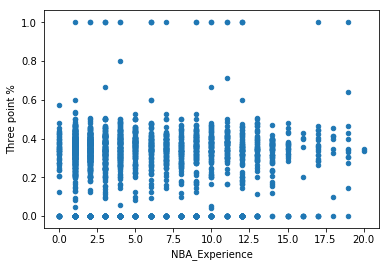

In [525]:
ncaa_clean.plot(y='Three point %', x= 'NBA_Experience',kind='scatter')
plt.show()

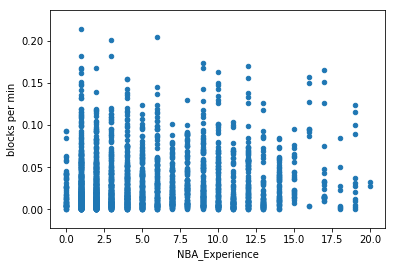

In [522]:
ncaa_clean.plot(y='blocks per min', x= 'NBA_Experience',kind='scatter')
plt.show()

In [8]:
for i in range(len(nba_stats.columns)):
    print(nba_stats.columns[i])

DISPLAY_FIRST_LAST
GROUP_VALUE
AST
AST_PCT
AST_PCT_RANK
AST_RANK
AST_RATIO
AST_RATIO_RANK
AST_TO
AST_TO_RANK
BIRTHDATE
BLK
BLKA
BLKA_RANK
BLK_RANK
CFID_x
CFID_y
CFPARAMS_x
CFPARAMS_y
COUNTRY
DD2
DD2_RANK
DEF_RATING
DEF_RATING_RANK
DRAFT_NUMBER
DRAFT_ROUND
DRAFT_YEAR
DREB
DREB_PCT
DREB_PCT_RANK
DREB_RANK
EFG_PCT
EFG_PCT_RANK
FG3A
FG3A_RANK
FG3M
FG3M_RANK
FG3_PCT
FG3_PCT_RANK
FGA_PG
FGA_PG_RANK
FGA_RANK_x
FGA_RANK_y
FGA_x
FGA_y
FGM_PG
FGM_PG_RANK
FGM_RANK_x
FGM_RANK_y
FGM_x
FGM_y
FG_PCT_RANK_x
FG_PCT_RANK_y
FG_PCT_x
FG_PCT_y
FROM_YEAR
FTA
FTA_RANK
FTM
FTM_RANK
FT_PCT
FT_PCT_RANK
GP
GP_RANK_x
GP_RANK_y
HEIGHT
L
L_RANK_x
L_RANK_y
MIN
MIN_RANK_x
MIN_RANK_y
NBA_FANTASY_PTS
NBA_FANTASY_PTS_RANK
NET_RATING
NET_RATING_RANK
OFF_RATING
OFF_RATING_RANK
OREB
OREB_PCT
OREB_PCT_RANK
OREB_RANK
PACE
PACE_RANK
PERSON_ID
PF
PFD
PFD_RANK
PF_RANK
PIE
PIE_RANK
PLUS_MINUS
PLUS_MINUS_RANK
POSITION
PTS
PTS_RANK
Player_Name
REB
REB_PCT
REB_PCT_RANK
REB_RANK
SCHOOL
SEASON_EXP
STL
STL_RANK
TD3
TD3_RANK
TEAM_ID
TM

In [28]:
nba_stats[nba_stats['FROM_YEAR'] < 2013]['SEASON_EXP'] <4

DISPLAY_FIRST_LAST
Earl Cureton         False
Andrew Gaze           True
Chris Jent            True
Adonis Jordan         True
Chris King            True
Jimmy Oliver         False
Jimmy Oliver         False
Jimmy Oliver         False
Willie Burton        False
Willie Burton        False
Willie Burton        False
Tom Chambers         False
Tom Chambers         False
Lloyd Daniels        False
Lloyd Daniels        False
Lloyd Daniels        False
Lloyd Daniels        False
Blue Edwards         False
Blue Edwards         False
Blue Edwards         False
Negele Knight        False
Larry Krystkowiak    False
Eric Mobley           True
Brian Oliver          True
Fred Vinson           True
Ennis Whatley        False
Sharone Wright        True
Sharone Wright        True
Derrick Alston        True
Ashraf Amaya          True
                     ...  
Nick Young           False
Nick Young           False
Nick Young           False
Nick Young           False
Nick Young           False
Nick Youn